# Flow Intercepting Facility Location Problems (FIFLP)

The first flow-based location model, the Flow-Capturing Location Model (FCLM), was proposed by Hodgson in 1990. Then, the Flow-Intercepting Location Model (FILM) was proposed by Berman et al.in 1992. In these models, demand is defined primarily by the flow on a predetermined route (usually the shortest path between origin and destination (O-D)). The basic models for such problems are developed, and heuristic algorithms are proposed for their solution. These models assume that flows can only be captured if there are service facilities on the path. Berman et al. relaxed this assumption by proposing that facilities 'near' these paths still have 'utility' for consumers. He defined deviation distance as the "extra distance" that consumers' deviation from the original path, and investigated the problem of interception siting considering the deviation distance. Mirchandani et al. demonstrated that the traditional interception siting problem is an NP-hard problem, and therefore, the computation time grows exponentially with the number of nodes.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#Maximization-of-the-Intercepted-Flow" data-toc-modified-id="Maximization-of-the-Intercepted-Flow-1.1">Maximization of the Intercepted Flow</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Random-Data" data-toc-modified-id="Random-Data-3.1">Random Data</a></span></li><li><span><a href="#Road-Network-Data" data-toc-modified-id="Road-Network-Data-3.2">Road Network Data</a></span></li></ul></li></ul></div>

## Problem Description

### Maximization of the Intercepted Flow

The solution to the model returns the location of the m facilities that **maximise the intercepted traffic**. 

*Parameters*:
* ***V*** : Set of nodes in the network
* ***P*** : Set of paths from origin to destination $(O-D)$ that are selected in the network
* ***V<sub>p</sub>*** : Set of nodes that within the path $p$
* ***F<sub>p</sub>*** : Flow of path $p$
* ***m*** : Number of facilities to be located

*Decision variables*:
$$
\begin{array}{lll}
x_{p}= \begin{cases}1, & \text { if at least one facility is located on path } p \\ 0, & \text { else }\end{cases}\\
y_{i}= \begin{cases}1, & \text { if a facility is located at node } i \\ 0, & \text { else }\end{cases}
\end{array}
$$

###  Integer programming model:

$$
\begin{array}{lll}
\text{Min} & \sum_{p \in P}f_{p}x_{p} & (1) \\
\text{s.t.} & \sum_{i \in V}y_{i}\;=\;m, & (2)\\
& \sum_{i \in V_{p}}y_{i} \;\ge\; x_{p} , \forall p \in P, & (3)\\
& x_{p}\;=\;\{0, 1\}, \forall p \in P, & (4)\\
& y_{i}\;=\;\{0, 1\}, \forall i \in V. & (5)\\
\end{array}
$$

Equation (2) specifies the number of facilities that must be placed. Equation (3) is a consistency constraint between the two types of variables. In fact, if no vertex on path p contains facilities (i.e. all yi are equal to 0,i∈Vp), then the variable xp must be equal to 0, i.e. path p is not intercepted. Otherwise, if at least one vertex of path p contains a facility (i.e. the variable yi, i ∈ Vp, is equal to 1), then the variable xp can be either 0 or 1. Due to the maximization of the objective function, the variable xp is assumed to have a value of 1, i.e. path p is intercepted. As mentioned above, even if the path flow encounters more than one facility, it will only be intercepted and counted once in the objective function (i.e. the objective function formula does not allow multiple counts).

## Setup

In [1]:
import random
from itertools import product
import numpy as np
from location.FModel import *
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
from pulp import *
from itertools import product
import pandas as pd

## Example

In [2]:
random.seed(1)
solver_list = listSolvers(onlyAvailable=True)
print(solver_list)  # 可用求解器输出

No parameters matching '_test' found
['CPLEX_CMD', 'GUROBI', 'GUROBI_CMD', 'PULP_CBC_CMD']


### Random Data

In [3]:
n = 10  # facility candidate sites
p = 5 # path num
m = 2   # choice facility
V = list(range(n))
df= [(random.random(), random.random()) for i in range(n)] # V 位置信息
P = list(range(p))
fp = [random.randint(5, 10) for i in range(p)]
Vp = [[0,1],[2,3],[4,5],[6,7],[8,9]]
e = 0.3 # [0,1]                                         # 1-ϵ :总流量中必须被拦截的部分 [0,1]
Ke = (1-e) * sum(fp)                                      # Kϵ :对应的流量值

In [4]:
selected_path, selected_vector= MaximumFlowInterceptionModel(num_path=P,
                              num_vector=V,
                              num_choice=m,
                              path_vector=Vp,
                              path_flow=fp,
                              solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected paths = [1, 2]
Selected points = [2, 4]
Maximum flow = 19.0


D:\miniconda3\envs\ox\Lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


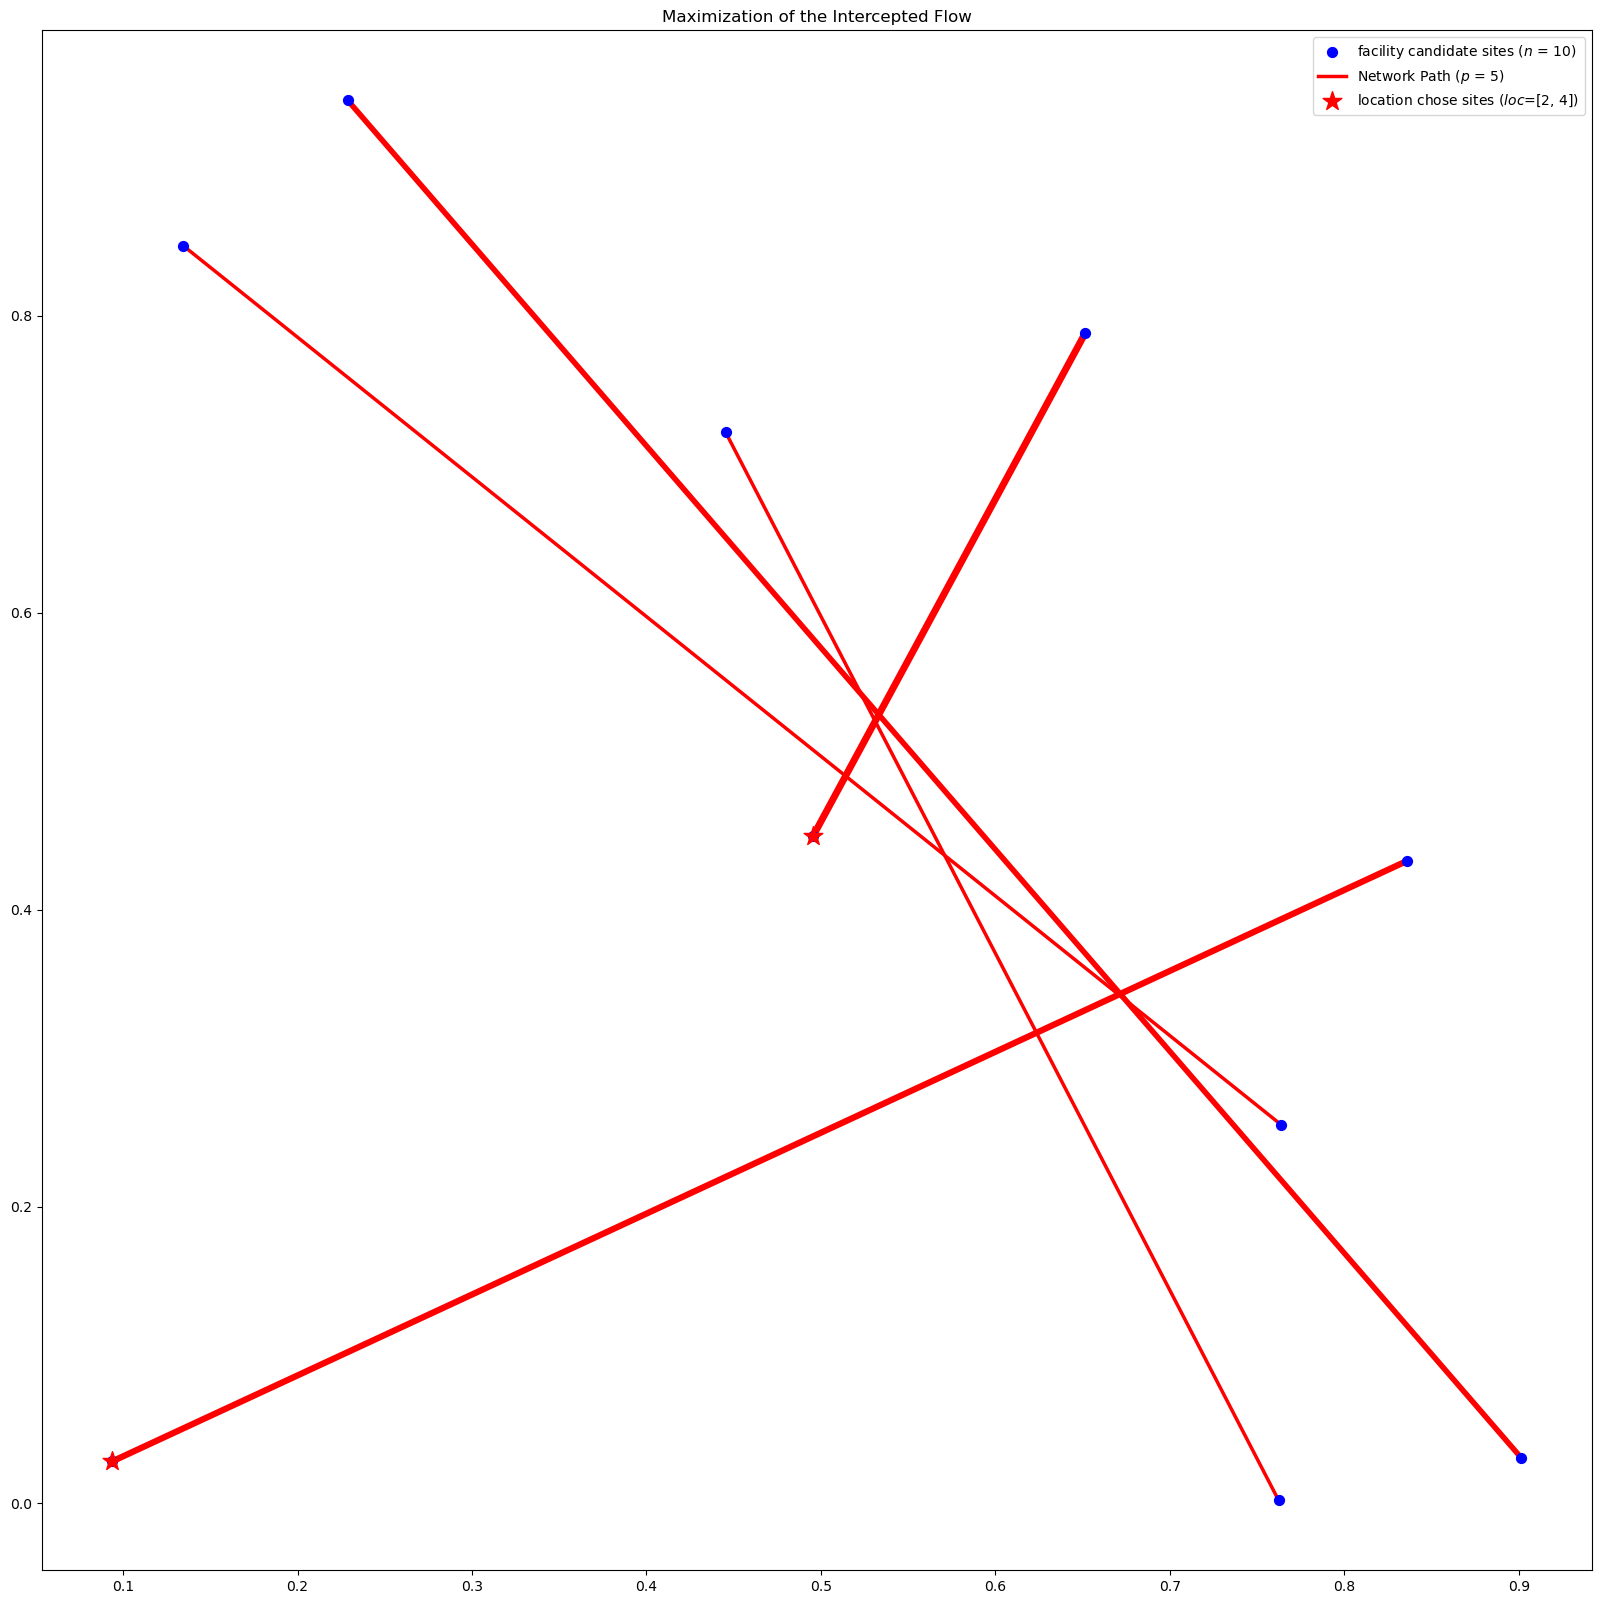

In [5]:
plt.figure(figsize=(20, 20))
plt.title('Maximization of the Intercepted Flow')
loc=[]
for i in selected_vector:
    loc.append(df[i])
plt.scatter(*zip(*df), c='Blue', marker='o', s=50, label=f"facility candidate sites ($n$ = {n})",zorder=2)

for j,i in enumerate(Vp):
    if j==0:
        plt.plot([df[i[0]][0], df[i[1]][0]], [df[i[0]][1], df[i[1]][1]],c='red',
                 linewidth=0.5*fp[j],label=f"Network Path ($p$ = {len(Vp)})",zorder=1)
    else:
        plt.plot([df[i[0]][0], df[i[1]][0]], [df[i[0]][1], df[i[1]][1]], c='red', linewidth=0.5 * fp[j], zorder=1)
plt.scatter(*zip(*loc), c="r", marker='*', s=200, label=f"location chose sites ($loc$={list(selected_vector)})", zorder=3)
plt.legend(loc='best', fontsize=10)
plt.show()

### Road Network Data

In [6]:
rdf = pd.read_csv('../data/北京POI裁剪.csv',encoding='gbk')
rdf = rdf.query('adname=="东城区" | adname=="西城区" | adname=="朝阳区" | adname=="海淀区"').reset_index(drop=True)
data = rdf[['long', 'lat']]
num_points = rdf.shape[0]
num_located = 10
np.random.seed(0)
num_people = np.random.randint(1,2, size=num_points)
cartesian_prod = list(product(range(num_points), range(num_points)))
points = [(data['long'][i], data['lat'][i]) for i in range(num_points)]
rn = 118  # facility candidate sites
rp = 59  # path num
rm = 5   # choice facility
rV = list(range(rn))
rP = list(range(rp))
rfp = [random.randint(1, 10) for i in range(rp)]
rVp = [[2*i, 2*i+1] for i in range(rp)]
re = 0.3 # [0,1]                                         # 1-ϵ :总流量中必须被拦截的部分 [0,1]
rKe = (1-e) * sum(rfp)

In [7]:
G = ox.load_graphml('../data/Beijing.graphml')

In [8]:
rselected_path, rselected_vector= MaximumFlowInterceptionModel(num_path=rP,
                                                              num_vector=rV,
                                                              num_choice=rm,
                                                              path_vector=rVp,
                                                              path_flow=rfp,
                                                              solver=GUROBI_CMD()).prob_solve()

Status: Optimal
Selected paths = [28, 32, 55, 56, 57]
Selected points = [57, 64, 110, 113, 115]
Maximum flow = 50.0


D:\miniconda3\envs\ox\Lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


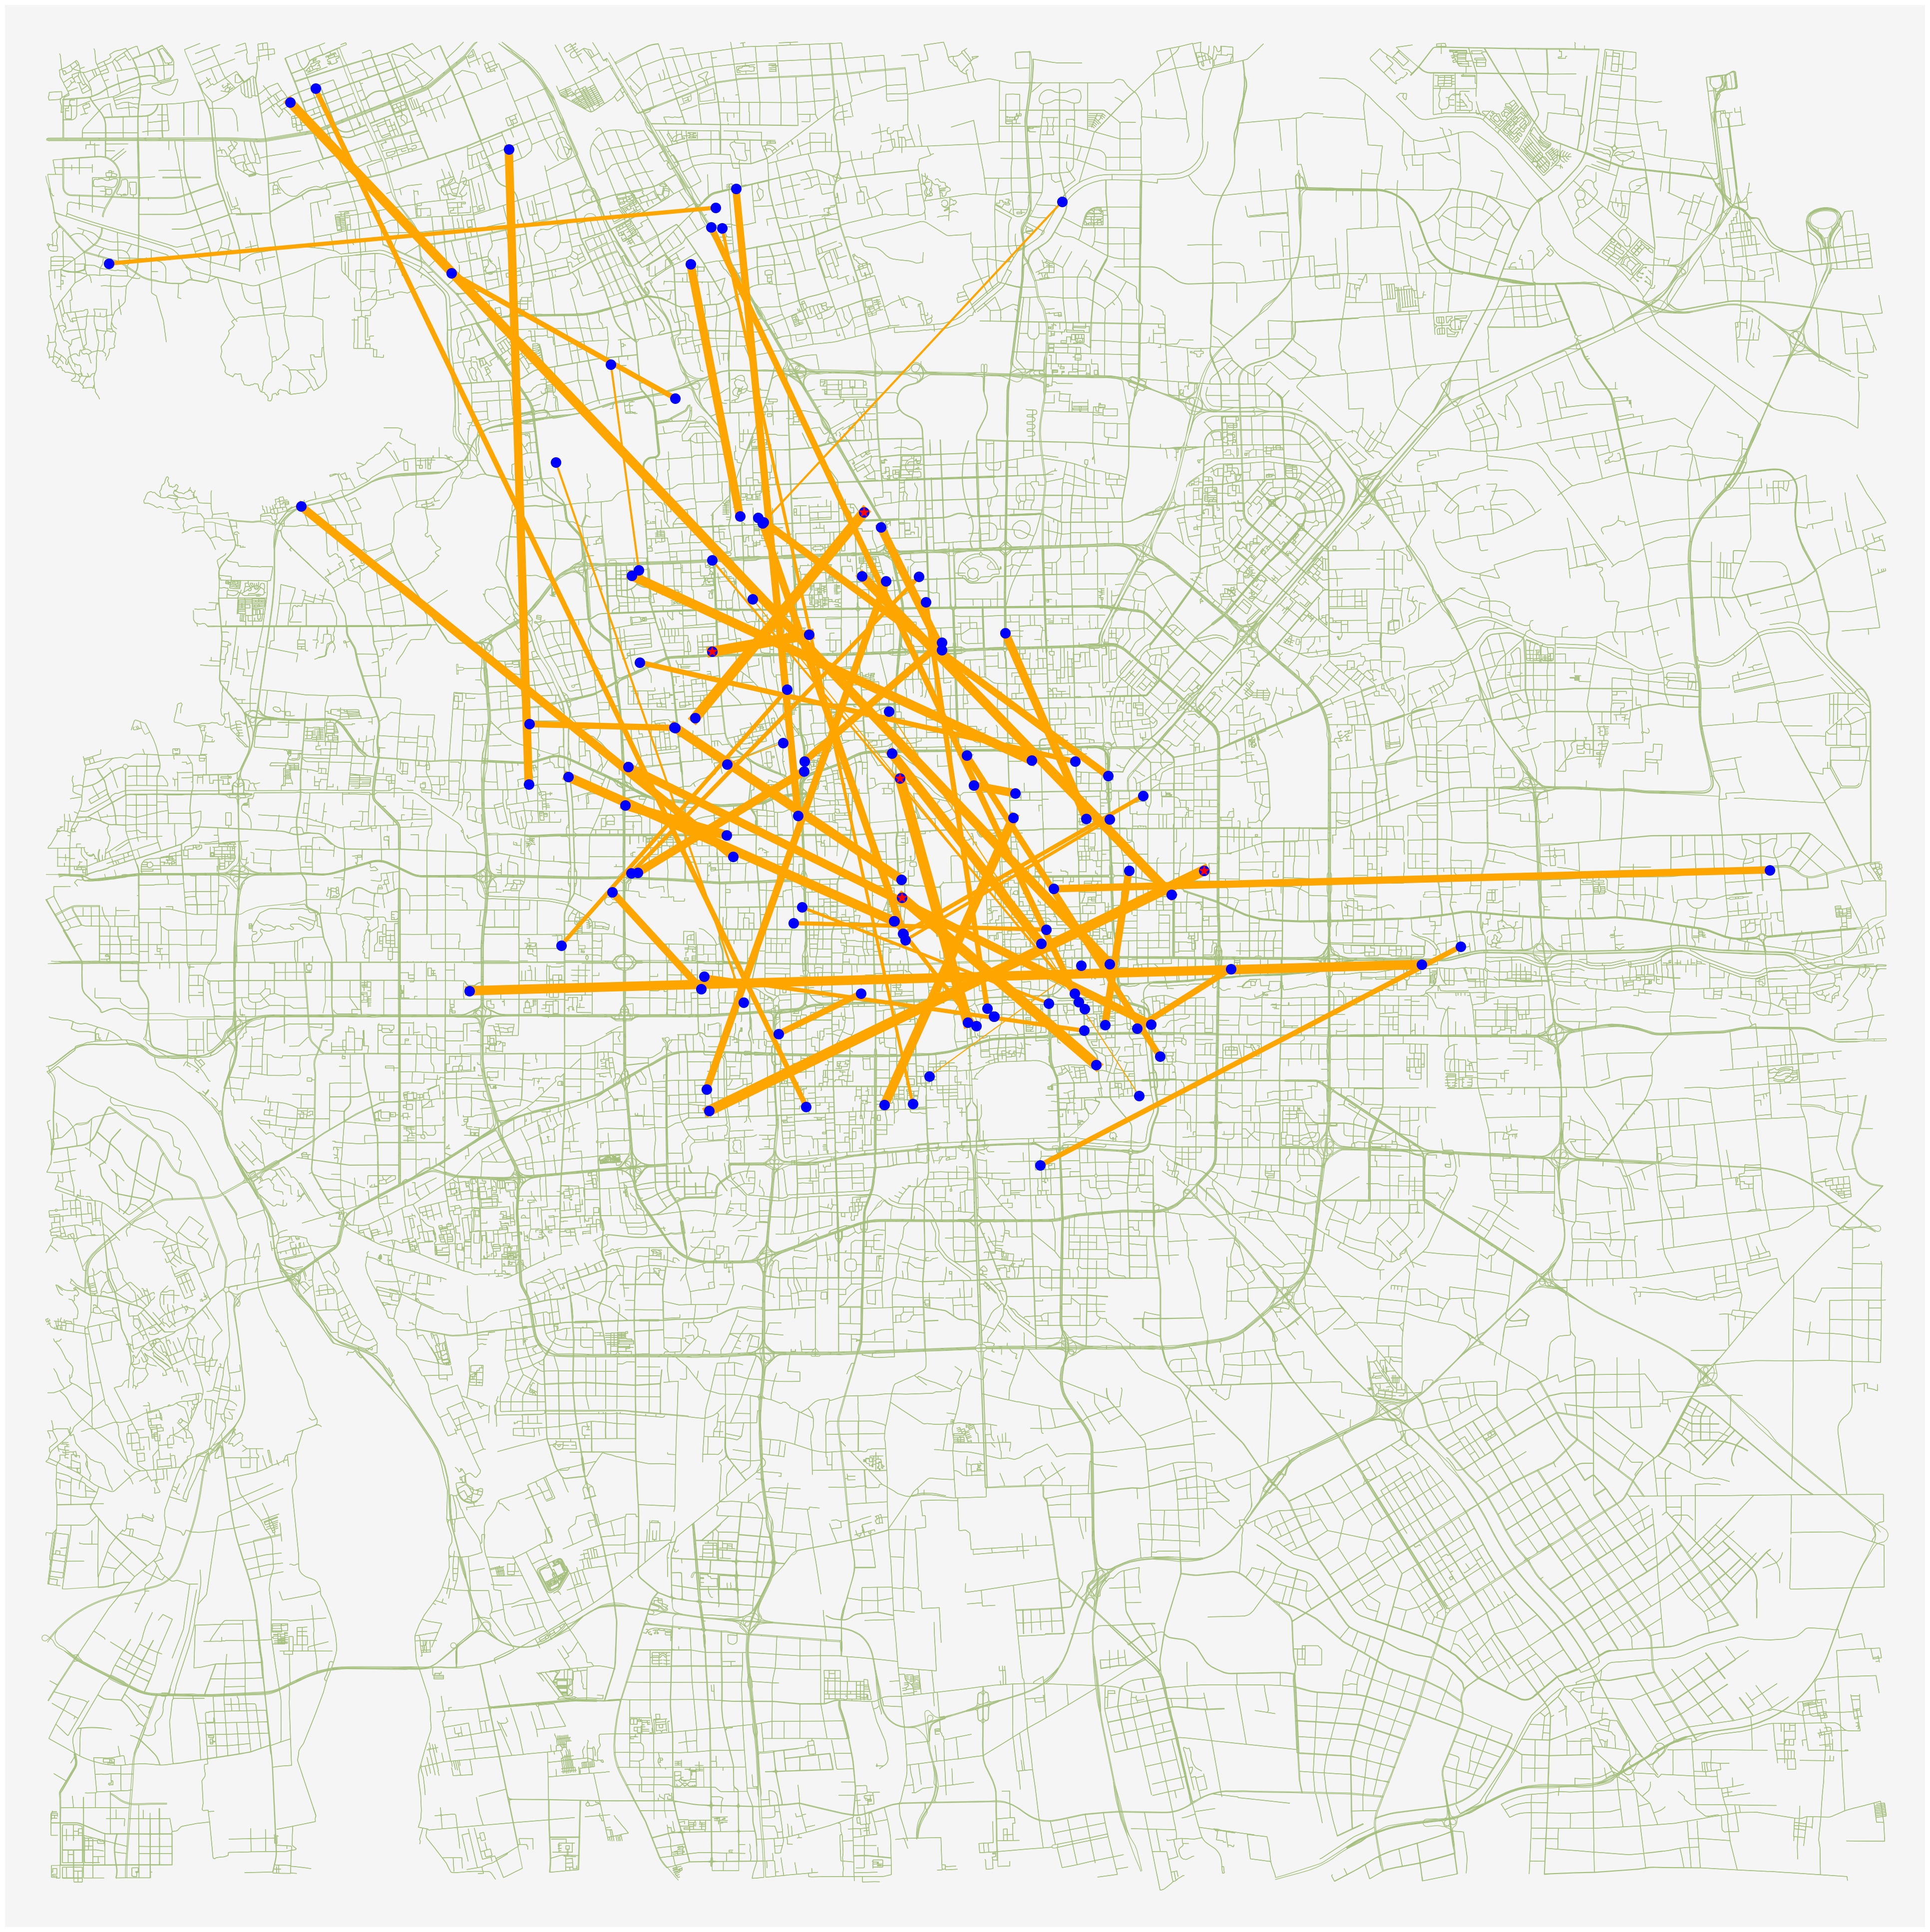

In [9]:
ox.plot_graph(G, figsize=(50,50),bgcolor="#F5F5F5",node_size=0,edge_color = "#A4BE7B", show=False, close=False)
loc=[]
for i in rselected_vector:
    loc.append(points[i])
plt.scatter(*zip(*points), c='Blue', marker='o', s=200,zorder=2)
#Lines
for j, i in enumerate(rVp):
    plt.plot([points[i[0]][0], points[i[1]][0]], [points[i[0]][1], points[i[1]][1]], c='Orange', linewidth=1.5 * rfp[j], zorder=1)
plt.scatter(*zip(*loc), c="r", marker='*', s=200, zorder=3)
plt.show()